# Watson Analytics

Watson Analytics is a Cloud Service offering AI capabilities via REST APIs. https://www.ibm.com/analytics/watson-analytics/us-en/index.html


https://github.com/watson-developer-cloud/python-sdk

```bash
pip install watson-developer-cloud
```
The API documentation is here:
https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/curl.html?curl


## Getting the Service Credentials

Service credentials are required to access the APIs.

To run locally or outside of Bluemix you need the `username` and `password` credentials for each service. (Service credentials are different from your Bluemix account email and password.)

To create an instance of the service:

  * Log in to [Bluemix](https://console.ng.bluemix.net).
  * Create an instance of the service:
    1. In the Bluemix Catalog, select the Watson service you want to use. For our example, select under *Watson* the *Visual Recognition* service.
    2. Type a unique name for the service instance in the Service name field. For example, type my-service-name. Leave the default values for the other options.
    3. Click Create.
    
    
To get your service credentials:

  * Copy your credentials from the *Service Details* page. To find the the *Service Details* page for an existing service, navigate to your Bluemix dashboard and click the service name.
  * On the *Service Details* page, click *Service Credentials*, and then *View Credentials*.
Copy username and password.


In [1]:
%%bash

echo "IBM_WATSON_API_KEY='YOUR_API_KEY'" >> ./api_keys.py

In [60]:
%load_ext autoreload
%autoreload 2
import api_keys


API_KEY = {
  "url": "https://gateway-a.watsonplatform.net/visual-recognition/api",
  "note": "It may take up to 5 minutes for this key to become active",
  "api_key": api_keys.IBM_WATSON_API_KEY
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Using the Network with Pre-trained Classifiers

In [62]:
# See example:
# https://github.com/watson-developer-cloud/python-sdk/blob/master/examples/visual_recognition_v3.py
import json
from watson_developer_cloud import VisualRecognitionV3


test_url = 'https://www.ibm.com/ibm/ginni/images/ginni_bio_780x981_v4_03162016.jpg'

visual_recognition = VisualRecognitionV3('2016-05-20', api_key=API_KEY['api_key'])

In [65]:
visual_recognition.classify?

Lets see what the Watson's Visual Recognition Classifier says to IBM's CEO Ginni Rometty.
![](https://www.ibm.com/ibm/ginni/images/ginni_bio_780x981_v4_03162016.jpg)

In [66]:
print(json.dumps(visual_recognition.classify(url=test_url), indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "womans portrait photo",
              "score": 0.599,
              "type_hierarchy": "/person/female/woman/womans portrait photo"
            },
            {
              "class": "woman",
              "score": 0.601
            },
            {
              "class": "female",
              "score": 0.602
            },
            {
              "class": "person",
              "score": 0.725
            },
            {
              "class": "adult person",
              "score": 0.559,
              "type_hierarchy": "/person/adult person"
            },
            {
              "class": "people",
              "score": 0.5,
              "type_hierarchy": "/person/people"
            },
            {
              "class": "light brown color",
              "score": 0.718
            },
     

In [67]:
visual_recognition.detect_faces?

In [68]:
print(json.dumps(visual_recognition.detect_faces(parameters=json.dumps({'url': test_url})), indent=2))

{
  "images": [
    {
      "faces": [
        {
          "age": {
            "min": 48,
            "max": 51,
            "score": 0.76694834
          },
          "face_location": {
            "height": 245,
            "width": 237,
            "left": 286,
            "top": 177
          },
          "gender": {
            "gender": "FEMALE",
            "score": 0.99999833
          }
        }
      ],
      "source_url": "https://www.ibm.com/ibm/ginni/images/ginni_bio_780x981_v4_03162016.jpg",
      "resolved_url": "https://www.ibm.com/ibm/ginni/images/ginni_bio_780x981_v4_03162016.jpg"
    }
  ],
  "images_processed": 1
}


In [69]:
print(json.dumps(visual_recognition.list_classifiers(), indent=2))

{
  "classifiers": []
}


To read more about what is possible via the Python API, see https://www.ibm.com/watson/developercloud/visual-recognition/api/v3/?python.

In essence, the Python API is just wrapping HTTP REST API calls with the `requests` module.

## How to classify a local image?

There are many labeled datasets used in image recognition research. One of them is the Caltech 101 dataset, see http://www.vision.caltech.edu/Image_Datasets/Caltech101/. The actual dataset is here: http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz


After downloading and and uncompressing the dataset, we can send the image of a butterfly to Watson.
![](images/image_0027.jpg)

In [70]:
with open('./images/image_0027.jpg', 'rb') as image_file:
    results = visual_recognition.classify(
            images_file=image_file,
            threshold='0.1')
    print(json.dumps(results, indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "monarch butterfly",
              "score": 0.87,
              "type_hierarchy": "/animal/invertebrate/insect/butterfly/monarch butterfly"
            },
            {
              "class": "butterfly",
              "score": 0.977
            },
            {
              "class": "insect",
              "score": 0.977
            },
            {
              "class": "invertebrate",
              "score": 0.977
            },
            {
              "class": "animal",
              "score": 0.977
            },
            {
              "class": "viceroy butterfly",
              "score": 0.782,
              "type_hierarchy": "/animal/invertebrate/insect/butterfly/viceroy butterfly"
            },
            {
              "class": "reddish orange color",
              "score": 0.889
       

# 

![](http://www.xpautographs.com/11337-7718-thickbox/mister-t-autograph.jpg)

In [71]:
mister_t_url = 'http://www.xpautographs.com/11337-7718-thickbox/mister-t-autograph.jpg'
print(json.dumps(visual_recognition.classify(url=mister_t_url), indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "person",
              "score": 0.825
            },
            {
              "class": "people",
              "score": 0.5,
              "type_hierarchy": "/person/people"
            },
            {
              "class": "Indian red color",
              "score": 0.97
            }
          ]
        }
      ],
      "source_url": "http://www.xpautographs.com/11337-7718-thickbox/mister-t-autograph.jpg",
      "resolved_url": "http://www.xpautographs.com/11337-7718-thickbox/mister-t-autograph.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


![](https://www.cphbusiness.dk/media/75910/lam.png)

In [72]:
lars_url = 'https://www.cphbusiness.dk/media/75910/lam.png'
print(json.dumps(visual_recognition.classify(url=lars_url), indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "walrus mustache",
              "score": 0.559,
              "type_hierarchy": "/person/walrus mustache"
            },
            {
              "class": "person",
              "score": 0.811
            },
            {
              "class": "beard",
              "score": 0.538,
              "type_hierarchy": "/person/beard"
            },
            {
              "class": "mustachio",
              "score": 0.511,
              "type_hierarchy": "/person/mustachio"
            },
            {
              "class": "person portrait photo",
              "score": 0.51,
              "type_hierarchy": "/person/person/person portrait photo"
            },
            {
              "class": "taxonomist",
              "score": 0.504,
              "type_hierarchy": "/person/taxonomist"
        

![](https://www.cphbusiness.dk/media/74691/ltje.jpg) 

In [73]:
line_url = 'https://www.cphbusiness.dk/media/74691/ltje.jpg'
print(json.dumps(visual_recognition.detect_faces(parameters=json.dumps({'url': line_url})), indent=2))

{
  "images": [
    {
      "faces": [
        {
          "age": {
            "min": 25,
            "max": 28,
            "score": 0.79470074
          },
          "face_location": {
            "height": 949,
            "width": 832,
            "left": 333,
            "top": 514
          },
          "gender": {
            "gender": "FEMALE",
            "score": 0.999997
          }
        }
      ],
      "source_url": "https://www.cphbusiness.dk/media/74691/ltje.jpg",
      "resolved_url": "https://www.cphbusiness.dk/media/74691/ltje.jpg"
    }
  ],
  "images_processed": 1
}


## Detecting Many Faces in an Image

![](http://www.albanyjobfair.com/wp-content/uploads/2014/01/BIz-people-2-300x276.jpg)

In [74]:
group_url = 'http://www.albanyjobfair.com/wp-content/uploads/2014/01/BIz-people-2-300x276.jpg'

print(json.dumps(visual_recognition.classify(url=group_url), indent=2))
print(json.dumps(visual_recognition.detect_faces(parameters=json.dumps({'url': group_url})), indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "wraparound",
              "score": 0.548,
              "type_hierarchy": "/garment/wraparound"
            },
            {
              "class": "garment",
              "score": 0.548
            },
            {
              "class": "family",
              "score": 0.525,
              "type_hierarchy": "/person/family"
            },
            {
              "class": "person",
              "score": 0.526
            },
            {
              "class": "people",
              "score": 0.563
            },
            {
              "class": "group of people",
              "score": 0.5
            },
            {
              "class": "alizarine red color",
              "score": 0.846
            },
            {
              "class": "ivory color",
              "score": 0.724
       

## Training your own Classifier

This is your task now. Take some images from different categories from the Caltech 101 dataset and train the neural network with them. For example, as in the following:

```python
with open('/path/to/butterflies.zip', 'rb') as butterflies, \
     open('/path/to/airplanes.zip'), 'rb') as airplanes:
    print(json.dumps(visual_recognition.create_classifier('ButterfliesvsPlanes', 
                                                          butterflies_positive_examples=butterflies, 
                                                          negative_examples=airplanes), 
                     indent=2))
```

When you created some classifiers, you can list them as in the following.

In [11]:
print(json.dumps(visual_recognition.list_classifiers(), indent=2))

{
  "classifiers": []
}


# How does this work? Introduction to Neural Networks.


A next step from a single perceptron -as seen in the last lecture- to an image classifier as above is a Multi-layer Perceptron.

![](http://www.saedsayad.com/images/Perceptron_bkp_1.png)



The code in the following is adapted from Chapter 18 "Neural Networks" in the Data Science from Scratch book. The code can be found at: https://github.com/joelgrus/data-science-from-scratch/blob/master/code-python3/neural_networks.py.

In [12]:
%load_ext autoreload

In [79]:
import random
from tqdm import tqdm


random.seed(0)   # to get repeatable results
input_size = 25  # each input is a vector of length 25

num_hidden = 5   # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for _ in range(input_size + 1)]
                 for _ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for _ in range(num_hidden + 1)]
                 for _ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]


print('Training...')

# 10,000 iterations seems enough to converge
for _ in tqdm(range(20000)):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

  0%|          | 50/20000 [00:00<00:40, 491.40it/s]

Training...


100%|██████████| 20000/20000 [00:42<00:00, 470.77it/s]


## A Trainings Dataset

We want to create a Multi-layer Perceptron, which can classifiy -or recognize- the digits from zero to nine for us. In `raw_digits` we create digits consisting out of 5x5 binary pixels. Consequently, each input in our trainings dataset is a binary vector of length 25.

In [75]:
raw_digits = [
        """11111
           1...1
           1...1
           1...1
           11111""",
        """..1..
           ..1..
           ..1..
           ..1..
           ..1..""",
        """11111
           ....1
           11111
           1....
           11111""",
        """11111
           ....1
           11111
           ....1
           11111""",
        """1...1
           1...1
           11111
           ....1
           ....1""",
        """11111
           1....
           11111
           ....1
           11111""",
        """11111
           1....
           11111
           1...1
           11111""",
        """11111
           ....1
           ....1
           ....1
           ....1""",
        """11111
           1...1
           11111
           1...1
           11111""",
        """11111
           1...1
           11111
           ....1
           11111"""]


def make_digit(raw_digit):
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]


inputs = [make_digit(raw_digit) for raw_digit in raw_digits]
inputs

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [76]:
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]
targets

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

For convience and reusabilty, we save the vectors containing the raw digits to a CSV file.

In [44]:
import numpy as np


print(np.array(inputs, dtype=np.int8))
#np.savetxt?
np.savetxt('./simple_digit_trainingset.csv', np.array(inputs, dtype=np.int8), delimiter=',', fmt='%d')

[[1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]]


In [45]:
%%bash
cat simple_digit_trainingset.csv

1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1
0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1
1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1


We create to helper functions, one for reading our trainings dataset from a file and a second one, which will plot it for inspection.

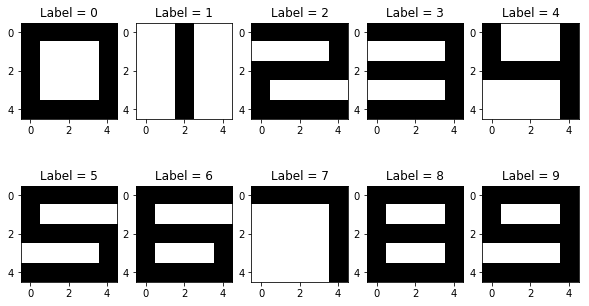

In [46]:
%matplotlib inline


import csv
import webget
import numpy as np
import matplotlib.pyplot as plt


filename = './simple_digit_trainingset.csv'


def read_data(filename):
    data = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            label = reader.line_num - 1
            image = np.array(row[:], dtype=np.int8)
            data.append((label, image))
    return data


def generate_plot(data):
    count = 0
    f = plt.figure(figsize=(10, 5))
    for idx, row in enumerate(data):
        imarray = row[1].reshape((5, 5))
        plt.subplot(2, 5, idx + 1)
        plt.subplots_adjust(hspace=0.5)
        count += 1
        plt.title('Label = {}'.format(row[0]))
        plt.imshow(imarray, cmap='Greys', interpolation='None')
    return plt


trainings_set = read_data(filename)
plt.show(generate_plot(trainings_set))

## The Actual Implementation

In [47]:
import math


def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


def sigmoid(t):
    return 1 / (1 + np.exp(-t))


def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))


def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs


def predict(in_put):
    return feed_forward(network, in_put)[-1]


def backpropagate(network, input_vector, target):

    hidden_outputs, outputs = feed_forward(network, input_vector)

    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target[i])
                     for i, output in enumerate(outputs)]

    # adjust weights for output layer (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # print(i,j)
            output_neuron[j] -= output_deltas[i] * hidden_output
    #print('----')
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # adjust weights for hidden layer (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, in_put in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * in_put

## A Test-dataset


[[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]]


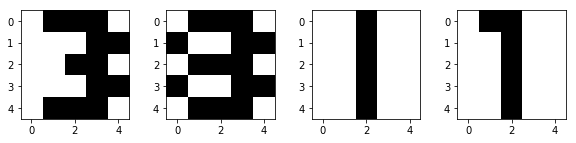

In [48]:
def plot_testset(data):
    count = 0
    f = plt.figure(figsize=(10, 5))
    data = np.array(data)
    for idx, row in enumerate(data):
        imarray = row.reshape((5, 5))
        plt.subplot(2, len(data), idx + 1)
        plt.subplots_adjust(hspace=0.5)
        count += 1
        plt.imshow(imarray, cmap='Greys', interpolation='None')
    return plt


test_set = [[0,1,1,1,0,
             0,0,0,1,1,
             0,0,1,1,0,
             0,0,0,1,1,
             0,1,1,1,0],
            [0,1,1,1,0,
             1,0,0,1,1,
             0,1,1,1,0,
             1,0,0,1,1,
             0,1,1,1,0],
            [0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0],
            [0,1,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0,
             0,0,1,0,0]]
print(test_set)
plt.show(plot_testset(test_set))

In [80]:
for test_data in test_set:
    result = predict(test_data)
    result = np.array(result)
    print(np.argmax(result), np.array_str(result, precision=2, suppress_small=True))

3 [0.   0.   0.   0.98 0.   0.   0.   0.01 0.   0.04]
9 [0.   0.   0.   0.   0.   0.6  0.   0.   0.93 1.  ]
1 [0.   0.98 0.02 0.01 0.01 0.   0.   0.   0.   0.  ]
3 [0.   0.19 0.   0.76 0.   0.   0.   0.   0.   0.  ]


In [ ]:
3 [0.   0.   0.   0.93 0.   0.   0.   0.01 0.   0.1 ]
9 [0.   0.   0.   0.   0.   0.54 0.   0.   0.91 1.  ]
1 [0.   0.96 0.03 0.02 0.   0.   0.   0.   0.   0.  ]
3 [0.   0.22 0.   0.73 0.   0.   0.   0.   0.   0.  ]

In [59]:
for test_data in inputs:
    result = predict(test_data)
    result = np.array(result)
    print(np.argmax(result), np.array_str(result, precision=2, suppress_small=True))

0 [0.97 0.   0.   0.   0.   0.   0.   0.02 0.02 0.  ]
1 [0.   0.98 0.02 0.01 0.01 0.   0.   0.   0.   0.  ]
2 [0.   0.02 0.97 0.   0.   0.02 0.   0.   0.   0.  ]
3 [0.   0.02 0.   0.98 0.   0.   0.   0.01 0.   0.02]
4 [0.   0.01 0.01 0.   0.99 0.   0.   0.   0.   0.  ]
5 [0.   0.   0.02 0.   0.   0.97 0.01 0.   0.01 0.01]
6 [0.   0.   0.01 0.   0.01 0.01 0.99 0.   0.01 0.  ]
7 [0.02 0.   0.   0.01 0.   0.   0.   0.98 0.   0.  ]
8 [0.02 0.   0.   0.   0.   0.01 0.   0.   0.97 0.02]
9 [0.   0.   0.   0.01 0.   0.01 0.   0.   0.02 0.97]


# Neural Networks Done Properly...

And we still have a bit to go from classifying digits with a Multi-layer Perceptron to a Convolutional Neural Network (CNN), which is the technique that IBM applies in Watson for visual recognition. A modern framework for implementing various types of neural networks is Google's Tensorflow.


```bash
pip install tensorflow
```

You can get more information about it here:

  * https://www.youtube.com/watch?v=qyvlt7kiQoI
  * https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0
  * https://github.com/martin-gorner/tensorflow-mnist-tutorial/blob/master/mnist_1.0_softmax.py
  * https://en.wikipedia.org/wiki/MNIST_database




# Exercise!!!

Your task is to extend the above example to work with the 'classical' MNIST dataset, which contains many thousands of handwritten digits. Your task is to watch the video https://www.youtube.com/watch?v=qyvlt7kiQoI on YouTube, which gives an introduction to Google's Tensorflow -a Python framework helping to build neural networks- and you follow the tutorial on https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist.

You have to reproduce their solution and the results at least until step 6 (including step 6) and futher if you feel like it.

# Possible Projects:

  * Implementation of a Salient Region Detector: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.228.5552&rep=rep1&type=pdf
  * Audio Fingerprinting: http://willdrevo.com/fingerprinting-and-audio-recognition-with-python/